# Source of Data Sets

#### https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data?select=features.csv.zip

# Guide Packages

In [1]:
!pip install numpy pandas matplotlib seaborn --quiet
import os
import math
import time
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')


from sklearn import metrics
from tensorflow import keras
from datetime import datetime
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

!pip install pingouin
import pingouin as pg

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, precision_recall_curve

     |████████████████████████████████| 182 kB 5.3 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 9.8 MB 41.4 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=044211c00a1b41f9012a4a8eedb3859604d5f5518035f9f826f0a3ef11bf5d77
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=07e781862ed518b126000fdfabac21c012310f851ddca8955ac26c3e29ba73b4
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

# Input Dataset


In [2]:
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/task-in/Task5/Task5-3")

Mounted at /content/drive


In [3]:
features = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/features.csv')
stores = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/train.csv')
test = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/test.csv')
sampleSubmission = pd.read_csv('/content/drive/MyDrive/task-in/Task5/Task5-3/sampleSubmission.csv')

In [4]:
print(features.info())
print('\n')
print(stores.info())
print('\n')
print(train.info())
print('\n')
print(test.info())
print('\n')
print(sampleSubmission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 

In [5]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [6]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [7]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [8]:
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [9]:
sampleSubmission.head(3)

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0


In [10]:
# print(features.isnull().sum())
# print('\n')
# print(stores.isnull().sum())
# print('\n')
# print(test.isnull().sum())
# print('\n')
# print(sampleSubmission.isnull().sum())
# print('\n')
# print(train.isnull().sum())

In [11]:
print("features.shape", features.shape)
print("stores.shape", stores.shape)
print("train.shape", train.shape)
print("test.shape", test.shape)
print("submission.shape", sampleSubmission.shape)

features.shape (8190, 12)
stores.shape (45, 3)
train.shape (421570, 5)
test.shape (115064, 4)
submission.shape (115064, 2)


# Merging Data Sets


In [12]:
feature_store = features.merge(stores, how='inner', on = "Store")
print("The number of rows and columns is: ",(feature_store.shape))
print("There are",(len(feature_store.Store.unique())), 'single stores')

train_df = train.merge(feature_store, how='inner', 
                       on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
print("The number of rows and columns is:",(train_df.shape))

test_df = test.merge(feature_store, how='inner', 
                     on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)
print("The number of rows and columns is: ",(test_df.shape))

The number of rows and columns is:  (8190, 14)
There are 45 single stores
The number of rows and columns is: (421570, 16)
The number of rows and columns is:  (115064, 15)


# Convert "Date" Column to Datetime Format

In [13]:
# train_df['Date'] = pd.to_datetime(train_df['Date'])
# train_df['Day'] = train_df['Date'].dt.day
def split_date(df, date):
  df['dt_ref'] = pd.to_datetime(df[date])
  df['year'] = df.dt_ref.dt.year
  df['month'] = df.dt_ref.dt.month
  df['day'] = df.dt_ref.dt.day
  df['week_of_year'] = df.dt_ref.dt.isocalendar().week
  df['period_month'] = df.dt_ref.dt.to_period('M')   #?

   month  Weekly_Sales  IsHoliday
0      2      24924.50      False
1      2      46039.49       True
2      2      41595.55      False
3      2      19403.54      False
4      3      21827.90      False


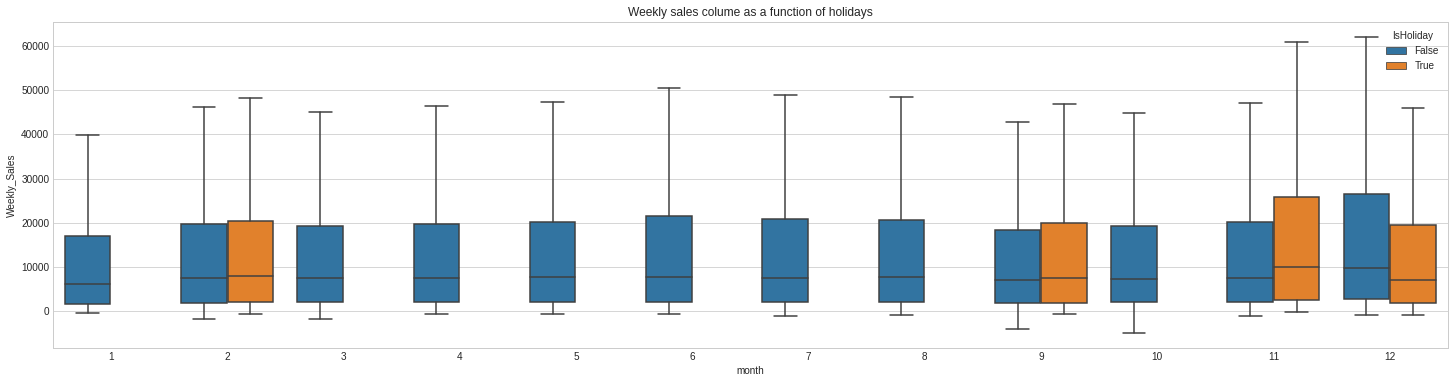

In [14]:
# IsHoliday - whether the week is a special holiday week
# Boxplt: distribution of observation data
'''
A boxplot contains six main data nodes, which arrange a set of data from largest to smallest.
And calculate his upper edge (upper limit), upper quartile Q3, median, lower quartile Q1, lower edge(lower limit).
And an outlier respectively.
'''
split_date(train_df, 'Date')

print(train_df[['month','Weekly_Sales','IsHoliday']].head())

plt.figure(figsize = (25,6))
plt.title ('Weekly sales colume as a function of holidays')
fig = sns.boxplot(x = 'month'
                  ,y = 'Weekly_Sales'
                  ,data = train_df[['month','Weekly_Sales','IsHoliday']]
                  ,showfliers = False
                  ,hue = 'IsHoliday')


### We can investigate the variation in sales between shops and the extent to which holidays affect sales in each shop

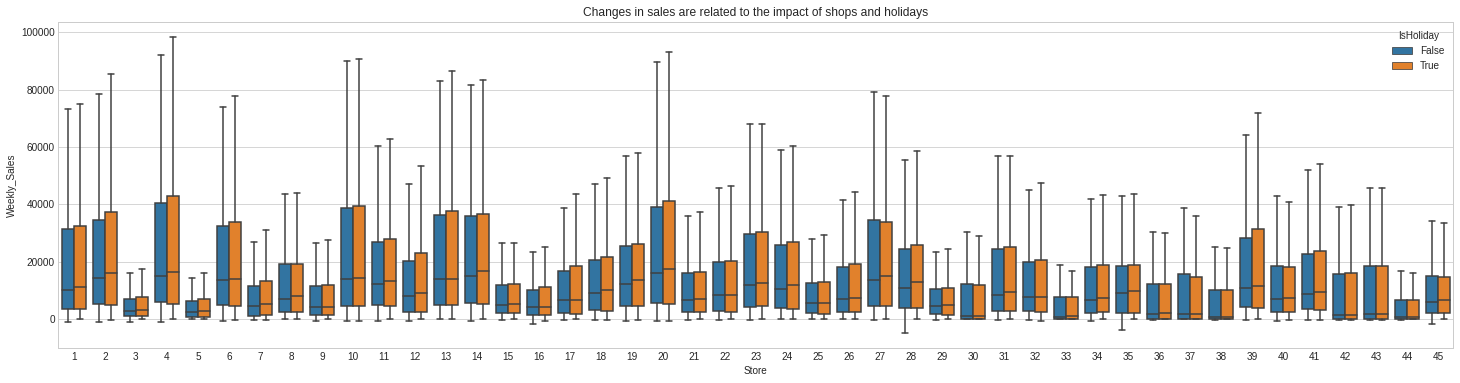

In [15]:
plt.figure(figsize = (25,6))
plt.title ('Changes in sales are related to the impact of shops and holidays')
fig = sns.boxplot(x = 'Store'
                  ,y = 'Weekly_Sales'
                  ,data = train_df[['Store','Weekly_Sales','IsHoliday']]
                  ,showfliers = False
                  ,hue = 'IsHoliday')

### Sales Per Week Per Year

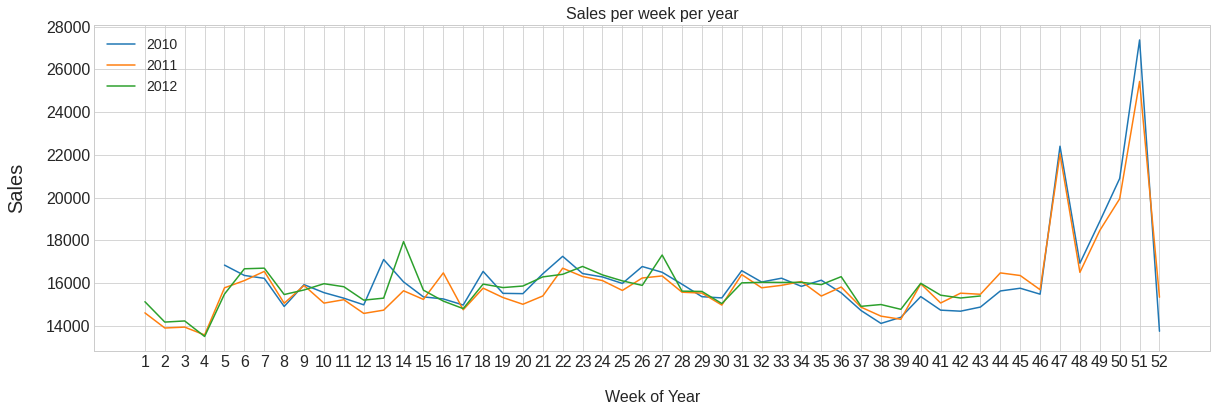

In [16]:
weekly_sales_2010 = train_df[train_df.year==2010].groupby('week_of_year')['Weekly_Sales'].mean()
weekly_sales_2011 = train_df[train_df.year==2011].groupby('week_of_year')['Weekly_Sales'].mean()
weekly_sales_2012 = train_df[train_df.year==2012].groupby('week_of_year')['Weekly_Sales'].mean()

plt.figure(figsize=(20,6))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=16, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Sales per week per year", fontsize=16)
plt.legend(['2010', '2011', '2012'], fontsize=14);

In [17]:
# Missing values
#train_df.isna().sum()
print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dt_ref               0
year                 0
month                0
day                  0
week_of_year         0
period_month         0
dtype: int64


Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
dtype: int64


In [18]:
# Missing values in 'train_df' and 'test_df' are filled in with '0' values
# However, in 'test_df', CPI and Unemployment are filled in with averages
# train_df,test_df
train_df.fillna(0, inplace = True)

test_df['CPI'].fillna(test_df['CPI'].mean(), inplace = True)
test_df['Unemployment'].fillna(test_df['Unemployment'].mean(), inplace = True)
test_df.fillna(0, inplace = True)

print(train_df.isnull().sum())
print('\n')
print(test_df.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dt_ref          0
year            0
month           0
day             0
week_of_year    0
period_month    0
dtype: int64


Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64


In [19]:
target = ['Weekly_Sales']
numeric_col = [
               'Store', 'Dept','Temperature', 'Fuel_Price',
               'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 
               'MarkDown5', 'CPI','Unemployment', 'IsHoliday', 'Size',
              ]
categorical_col = ['Date', 'period_month','month', 'year', 'Store', 'Type', 'week_of_year']

def create_encode(df, col):
    le = LabelEncoder()
    a = le.fit_transform(train_df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    col_names = [col+ "_" + str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a), columns = col_names))

In [20]:
temp = train_df[numeric_col]

for col in categorical_col:
    temp_df = create_encode(train_df, col)
    temp = pd.concat([temp, temp_df], axis=1)

In [21]:
print('Shape of Data: ', temp.shape)
print('Distinct Datatypes: ', temp.dtypes.unique())

Shape of Data:  (421570, 304)
Distinct Datatypes:  [dtype('int64') dtype('float64') dtype('bool')]


In [22]:
temp['IsHoliday'] = np.where(temp['IsHoliday']=='0', 0,1)
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(temp, train_df[target], test_size=0.2, random_state=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1000)

In [24]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_val: ', X_val.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_val: ', y_val.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (303530, 304)
Shape of X_val:  (33726, 304)
Shape of X_test:  (84314, 304)
Shape of y_train:  (303530, 1)
Shape of y_val:  (33726, 1)
Shape of y_test:  (84314, 1)


In [25]:
model = Sequential()
model.add(Dense(350, input_dim=304, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(350, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 350)               106750    
_________________________________________________________________
dense_1 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_2 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_3 (Dense)              (None, 350)               122850    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 351       
Total params: 475,651
Trainable params: 475,651
Non-trainable params: 0
_________________________________________________________________


In [26]:
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# epochs = 100
# batch_size = 64
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
epochs = 10
batch_size = 32

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/10
7589/7589 [==============================] - 34s 4ms/step - loss: 15987.2754 - mean_absolute_error: 15987.2754 - val_loss: 16027.4297 - val_mean_absolute_error: 16027.4297
Epoch 2/10
7589/7589 [==============================] - 32s 4ms/step - loss: 15987.2559 - mean_absolute_error: 15987.2559 - val_loss: 16027.4297 - val_mean_absolute_error: 16027.4297
Epoch 3/10
7589/7589 [==============================] - 33s 4ms/step - loss: 15987.2686 - mean_absolute_error: 15987.2686 - val_loss: 16027.4297 - val_mean_absolute_error: 16027.4297
Epoch 4/10
7589/7589 [==============================] - 33s 4ms/step - loss: 15987.2305 - mean_absolute_error: 15987.2305 - val_loss: 16027.4297 - val_mean_absolute_error: 16027.4297
Epoch 5/10
7589/7589 [==============================] - 31s 4ms/step - loss: 15987.2910 - mean_absolute_error: 15987.2910 - val_loss: 16027.4297 - val_mean_absolute_error: 16027.4297
Epoch 6/10
7589/7589 [==============================] - 33s 4ms/step - loss: 15987.21

## Evaluate Model on Test Data

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

2635/2635 [==============================] - 7s 2ms/step - loss: 15908.1455 - mean_absolute_error: 15908.1455
Test accuracy 15908.1455078125
Test loss 15908.1455078125


In [28]:
prediction = model.predict(X_test)
# print(prediction)

## Plot the Model's Training and Validation loss

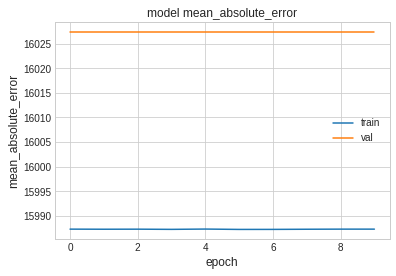

In [30]:
metric = "mean_absolute_error"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()